# **Eksplorasi Data Awal**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
pip install pandas numpy matplotlib scikit-learn

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  # Import SVR
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Memuat dataset
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
# cek ukuran data (baris, kolom)
df.shape

(517, 13)

In [5]:
# informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
# cek statistik deskriptif data
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


<Axes: >

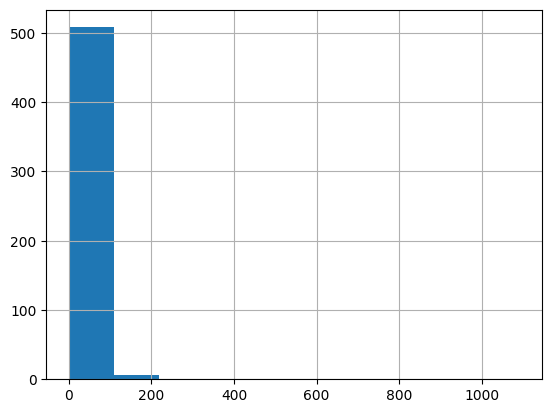

In [7]:
df['area'].hist()

# **Pra-pemrosesan Data**

In [8]:
# Transformasi logaritma untuk variabel 'area'
df['log_area'] = np.log1p(df['area'])

In [9]:
# Konversi variabel 'month' dan 'day' menjadi numerik
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
df['day'] = pd.to_datetime(df['day'], format='%a').dt.weekday

In [10]:
# Skala fitur numerik
scaler = StandardScaler()
df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']] = scaler.fit_transform(
    df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']])


# **Pembangunan Model**

In [11]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(['area', 'log_area'], axis=1)
y = df['log_area']

In [12]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Support Vector Regression

In [13]:
# Inisialisasi dan latih model Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [14]:
# Prediksi dengan data uji
y_pred_svr = svr_model.predict(X_test)

In [15]:
# Evaluasi model SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print(f'Support Vector Regression MAE: {mae_svr}')
print(f'Support Vector Regression RMSE: {rmse_svr}')

Support Vector Regression MAE: 1.080318592521745
Support Vector Regression RMSE: 1.550862666647582


Random Forest Regressor

In [16]:
# Inisialisasi dan latih model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Prediksi dengan data uji
y_pred_rf = rf_model.predict(X_test)

In [18]:
# Evaluasi model Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'Random Forest Regressor MAE: {mae_rf}')
print(f'Random Forest Regressor RMSE: {rmse_rf}')

Random Forest Regressor MAE: 1.2160117252041132
Random Forest Regressor RMSE: 1.5214142214141024


In [19]:
# Menentukan parameter yang ingin dicoba dalam GridSearch
param_grid = {
    'n_estimators': [50, 100, 150, 200],           # Jumlah pohon dalam hutan
    'max_depth': [None, 10, 20, 30],                # Kedalaman pohon
    'min_samples_split': [2, 5, 10],                 # Jumlah minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4],                   # Jumlah minimum sampel pada leaf node
    'bootstrap': [True, False]                       # Apakah menggunakan bootstrap sampling
}

In [20]:
# Inisialisasi GridSearchCV untuk melakukan tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [21]:
# Latih model dengan GridSearch
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [22]:
# Ambil model terbaik setelah GridSearch
best_rf_model = grid_search.best_estimator_

In [23]:
# Prediksi dengan data uji menggunakan model terbaik
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluasi model yang sudah dituning
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))

print(f'Random Forest Regressor MAE (Tuned): {mae_rf_tuned}')
print(f'Random Forest Regressor RMSE (Tuned): {rmse_rf_tuned}')

Random Forest Regressor MAE (Tuned): 1.205329448779311
Random Forest Regressor RMSE (Tuned): 1.4998480677532482


In [24]:
# Tampilkan hasil terbaik dari GridSearch
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


# **Evaluasi Model**

In [25]:
# Visualisasi perbandingan nilai aktual dan prediksi untuk kedua model
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

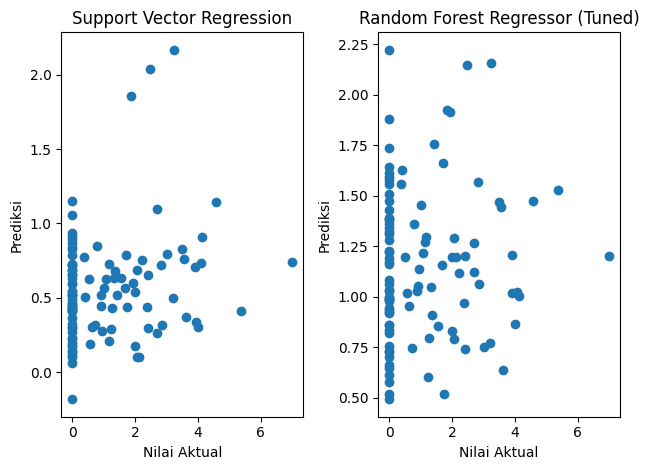

In [26]:
# Support Vector Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr)
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Support Vector Regression')

# Random Forest Regressor (Tuned)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf_tuned)
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Random Forest Regressor (Tuned)')

plt.tight_layout()
plt.show()

In [27]:
# Menyimpan DataFrame yang telah diproses ke file CSV
df.to_csv('forestfires_processed.csv', index=False)
from google.colab import files
files.download('forestfires_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
pip freeze > requirements.txt